In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
#Loading and Inspecting the Data
df = pd.read_csv("Air_Quality.csv")
print(df.shape)
print(df.columns.tolist())
print(df.info())
print(df.head())

(18862, 11)
['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info', 'Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Time Period', 'Start_Date', 'Data Value']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18862 entries, 0 to 18861
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       18862 non-null  int64  
 1   Indicator ID    18862 non-null  int64  
 2   Name            18862 non-null  object 
 3   Measure         18862 non-null  object 
 4   Measure Info    18862 non-null  object 
 5   Geo Type Name   18862 non-null  object 
 6   Geo Join ID     18862 non-null  int64  
 7   Geo Place Name  18862 non-null  object 
 8   Time Period     18862 non-null  object 
 9   Start_Date      18862 non-null  object 
 10  Data Value      18862 non-null  float64
dtypes: float64(1), int64(3), object(7)
memory usage: 1.6+ MB
None
   Unique ID  Indicator ID                    Name Measure Measure In

In [53]:
# Check available columns
print("Columns in dataset:", df.columns.tolist())

# Rename columns to remove any extra spaces (optional but useful)
df.columns = df.columns.str.strip()

# Clean Data: Drop rows with missing important values
required_cols = ['Data Value', 'Start_Date', 'Name', 'Geo Place Name']
existing_cols = [col for col in required_cols if col in df.columns]
df.dropna(subset=existing_cols, inplace=True)

# Convert 'Start_Date' to datetime if it exists
if 'Start_Date' in df.columns:
    df['Start_Date'] = pd.to_datetime(df['Start_Date'], errors='coerce')
    df.dropna(subset=['Start_Date'], inplace=True)
    df['Year'] = df['Start_Date'].dt.year

# Print Data Inf
print("Cleaned Data Shape:", df.shape)
print("Sample Rows After Cleaning:")
print(df.head())


Columns in dataset: ['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info', 'Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Time Period', 'Start_Date', 'Data Value']
Cleaned Data Shape: (18580, 12)
Sample Rows After Cleaning:
   Unique ID  Indicator ID                    Name Measure Measure Info  \
0     336867           375  Nitrogen dioxide (NO2)    Mean          ppb   
1     336741           375  Nitrogen dioxide (NO2)    Mean          ppb   
2     550157           375  Nitrogen dioxide (NO2)    Mean          ppb   
3     412802           375  Nitrogen dioxide (NO2)    Mean          ppb   
4     412803           375  Nitrogen dioxide (NO2)    Mean          ppb   

  Geo Type Name  Geo Join ID                     Geo Place Name  \
0            CD          407      Flushing and Whitestone (CD7)   
1            CD          107              Upper West Side (CD7)   
2            CD          414  Rockaway and Broad Channel (CD14)   
3            CD          407      Flushing 

In [69]:
print("Mean:", np.mean(df['Data Value']))
print("Median:", np.median(df['Data Value']))
print("Standard Deviation:", np.std(df['Data Value']))
print("Min:", np.min(df['Data Value']))
print("Max:", np.max(df['Data Value']))

Mean: 21.16348896168089
Median: 14.81
Standard Deviation: 23.711754142441553
Min: 0.0
Max: 424.7


In [54]:
#getting the description of the dataset
df.describe()

,Unique ID,Indicator ID,Geo Join ID,Start_Date,Data Value,Year
count,18580.000000,18580.000000,1.858000e+04,18580,18580.000000,18580.000000
mean,452614.704629,432.756136,5.958388e+05,2015-02-24 09:06:51.539289344,21.163489,2014.715285
min,130355.000000,365.000000,1.000000e+00,2005-01-01 00:00:00,0.000000,2005.000000
25%,176002.750000,365.000000,2.020000e+02,2011-06-01 00:00:00,8.780000,2011.000000
50%,412529.500000,375.000000,3.030000e+02,2015-01-01 00:00:00,14.810000,2015.000000
75%,669659.250000,386.000000,4.040000e+02,2019-01-01 00:00:00,26.438766,2019.000000
max,878254.000000,661.000000,1.051061e+08,2023-06-01 00:00:00,424.700000,2023.000000
std,264851.414737,114.549684,7.803541e+06,NaN,23.712392,4.806162


In [55]:
#Top 10 Indicators and their Measures
print(df['Name'].value_counts().head(10))
print(df[['Name', 'Measure', 'Measure Info']].drop_duplicates().head(10))

Name
Nitrogen dioxide (NO2)                                 6204
Fine particles (PM 2.5)                                6204
Ozone (O3)                                             2115
Asthma emergency department visits due to PM2.5         480
Asthma hospitalizations due to Ozone                    480
Asthma emergency departments visits due to Ozone        480
Annual vehicle miles traveled (cars)                    321
Annual vehicle miles traveled (trucks)                  321
Annual vehicle miles traveled                           321
Respiratory hospitalizations due to PM2.5 (age 20+)     240
Name: count, dtype: int64
                                                   Name  \
0                                Nitrogen dioxide (NO2)   
18                              Fine particles (PM 2.5)   
132               Boiler Emissions- Total SO2 Emissions   
305                                          Ozone (O3)   
954     Asthma emergency department visits due to PM2.5   
1239           

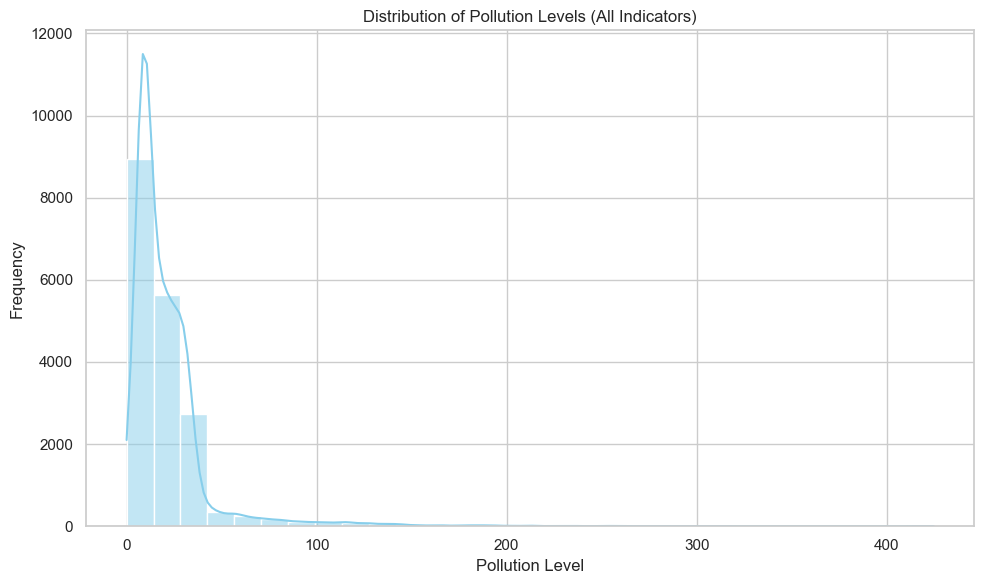

In [56]:
# 1. Histogram: Pollution Level Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Data Value'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Pollution Levels (All Indicators)")
plt.xlabel("Pollution Level")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

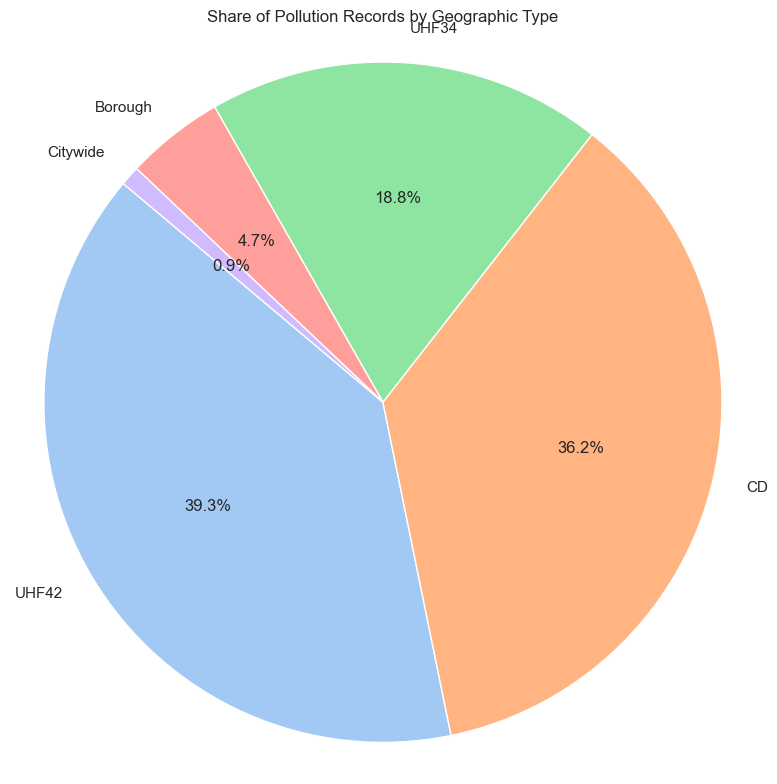

In [57]:
# 2. Pie Chart: Record Count by Geo Type
geo_counts = df['Geo Type Name'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(geo_counts.values, labels=geo_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Share of Pollution Records by Geographic Type")
plt.axis('equal')
plt.tight_layout()
plt.show()

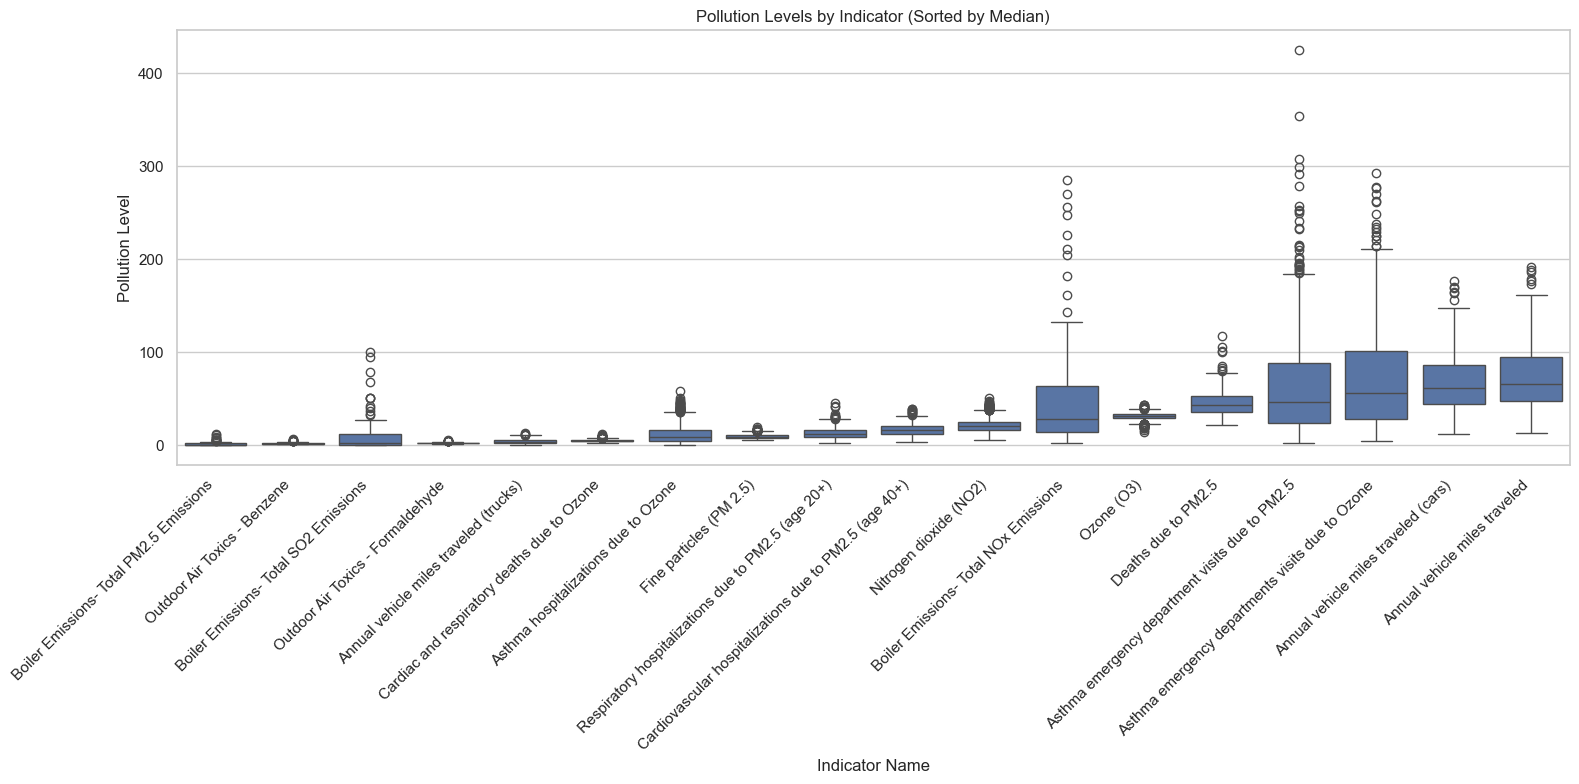

In [59]:
#  4. Boxplot: Sorted Indicator Names by Median
median_values = df.groupby('Name')['Data Value'].median().sort_values()
sorted_names = median_values.index.tolist()
df_sorted = df[df['Name'].isin(sorted_names)].copy()
df_sorted['Name'] = pd.Categorical(df_sorted['Name'], categories=sorted_names, ordered=True)
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_sorted, x='Name', y='Data Value')
plt.xticks(rotation=45, ha='right')
plt.title("Pollution Levels by Indicator (Sorted by Median)")
plt.xlabel("Indicator Name")
plt.ylabel("Pollution Level")
plt.tight_layout()
plt.show()

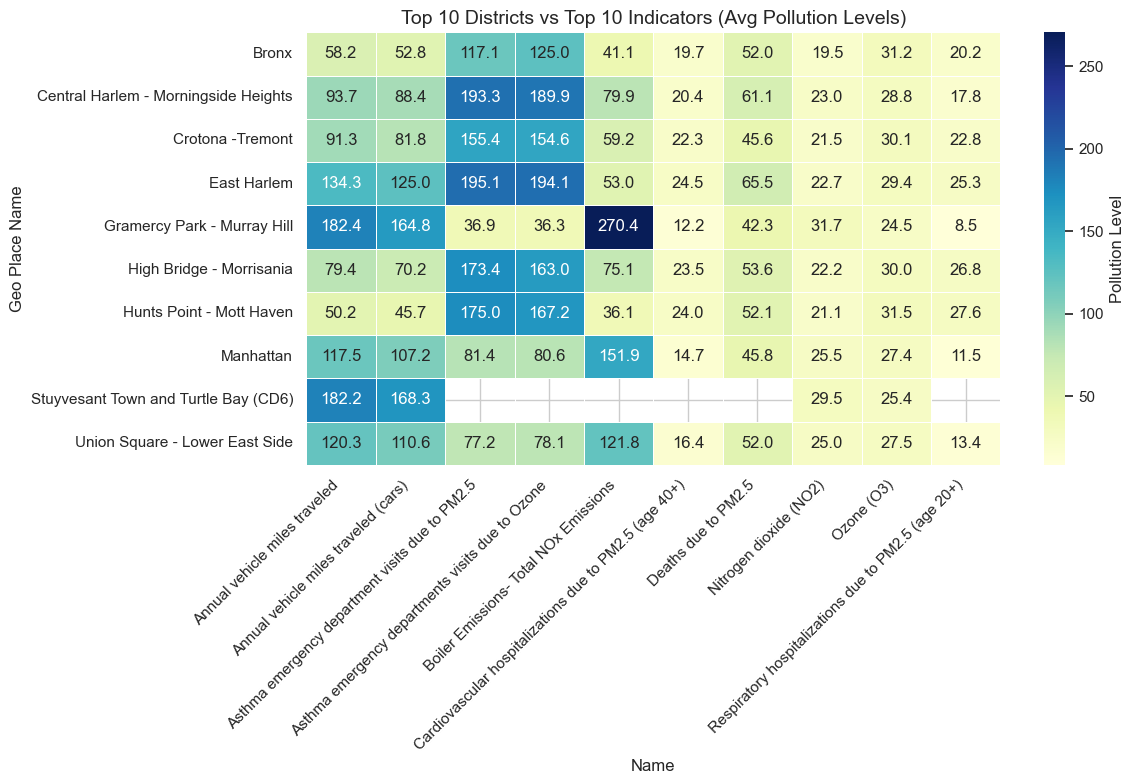

In [61]:
# 5. Heatmap: Top 10 Indicators vs Top 10 Districts
# Top indicators by average value
top_indicators = df.groupby('Name')['Data Value'].mean().sort_values(ascending=False).head(10).index.tolist()
top_districts = df.groupby('Geo Place Name')['Data Value'].mean().sort_values(ascending=False).head(10).index.tolist()
filtered_df = df[df['Name'].isin(top_indicators) & df['Geo Place Name'].isin(top_districts)]
pivot = filtered_df.pivot_table(index='Geo Place Name', columns='Name', values='Data Value', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5, cbar_kws={'label': 'Pollution Level'})
plt.title("Top 10 Districts vs Top 10 Indicators (Avg Pollution Levels)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


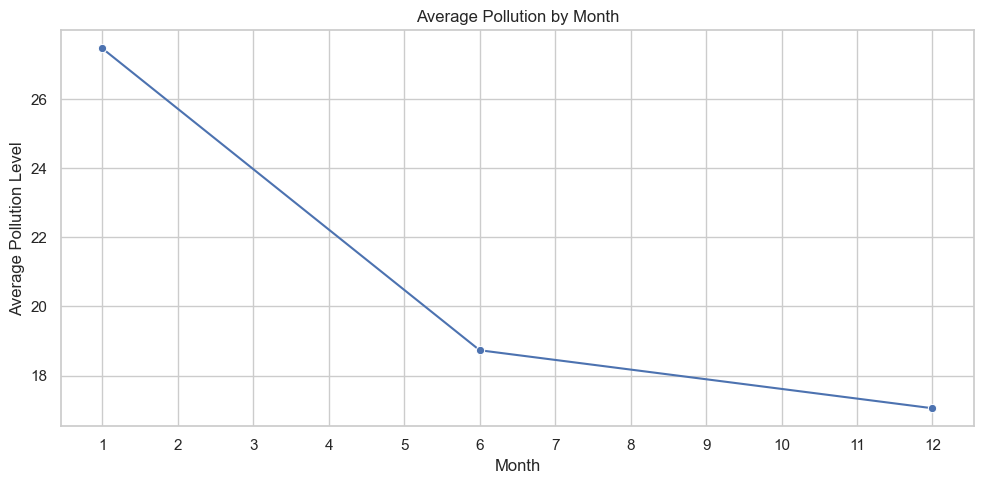

In [62]:
# 6. Line Plot: Monthly Trend
monthly_avg = df.groupby(df['Start_Date'].dt.month)['Data Value'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
plt.title("Average Pollution by Month")
plt.xlabel("Month")
plt.ylabel("Average Pollution Level")
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

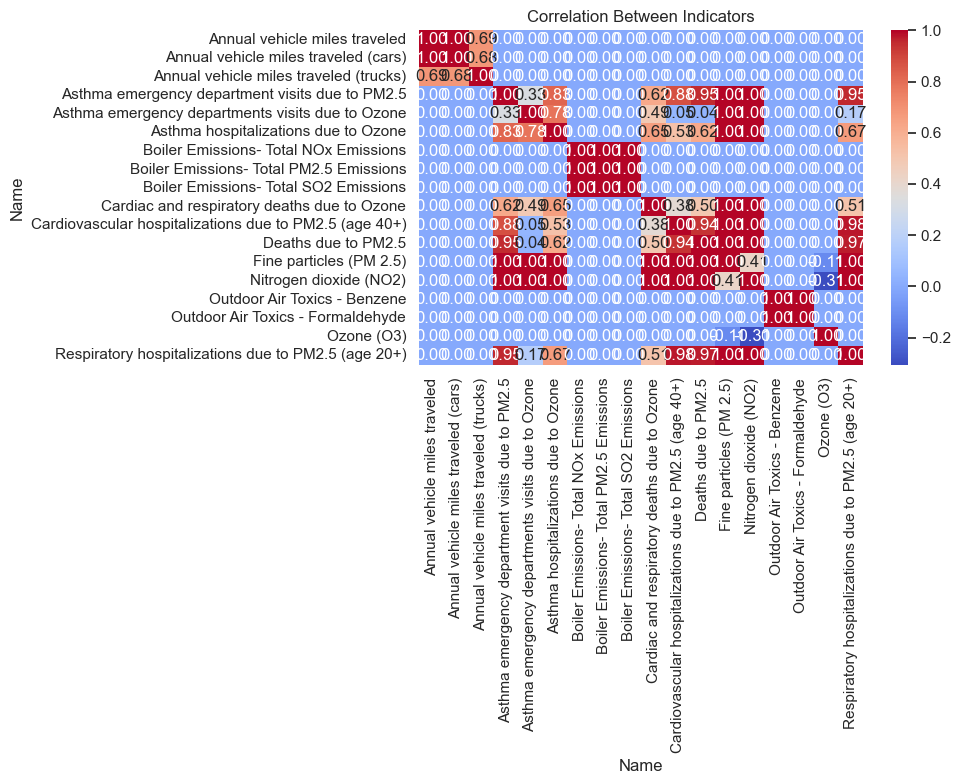

In [66]:
# 7. Indicator Correlation Heatmap
pivot_corr = df.pivot_table(index='Start_Date', columns='Name', values='Data Value')
corr = pivot_corr.corr().fillna(0)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Between Indicators")
plt.tight_layout()
plt.show()

In [68]:
# PROJECT SUMMARY

pollution_values = df['Data Value'].dropna().values

mean_val = np.mean(pollution_values)
median_val = np.median(pollution_values)
std_dev = np.std(pollution_values)
min_val = np.min(pollution_values)
max_val = np.max(pollution_values)
percentiles = np.percentile(pollution_values, [25, 50, 75])

print("OVERALL NUMPY STATS:")
print(f"Mean Pollution Value: {mean_val:.2f}")
print(f"Median Pollution Value: {median_val:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Min: {min_val:.2f}, 25th: {percentiles[0]:.2f}, 50th: {percentiles[1]:.2f}, 75th: {percentiles[2]:.2f}, Max: {max_val:.2f}")



OVERALL NUMPY STATS:
Mean Pollution Value: 21.16
Median Pollution Value: 14.81
Standard Deviation: 23.71
Min: 0.00, 25th: 8.78, 50th: 14.81, 75th: 26.44, Max: 424.70
